## Functional forms implemented in debris_disk

*Import Disclaimer* : For each model, the profile is in *density* and the image is *intensity* so they will look a little different. Feel free to copy this notebook to manipulate parameters and see how the profile/image changes.

In [1]:
import debris_disk as DD
import time
import numpy as np
import debris_disk.constants as const
import debris_disk.profiles as prof
from matplotlib import pyplot as plt

In [2]:
data_fps_list = ['/arc/projects/ARKS/data/products/HD170773/visibilities/HD170773.12m.continuum.fav.tav.corrected.txt']
vis = DD.UVDataset(data_fps_list)

In [3]:
obs_params = DD.Observation(vis=vis,                              
                            json_file='/arc/projects/ARKS/parametric_modeling/REASONS.json',
                            sys_name='HD95086')

# Double Power Law

In [25]:
rad_params = {'alpha_in': 4, 'alpha_out': -10, 'rc': 200, 'gamma': 2}

vert_params = {'Hc' : .03,
               'Rc' : 1,
               'psi' : 1.}

In [26]:
mod  = DD.Disk(L_star=1, # L_sun
               inc=0, # Degrees
               sigma_crit = 1e-59,
               radial_func='double_powerlaw', # options: gaussian
               radial_params=rad_params,
               vert_func='gaussian',
               vert_params=vert_params,
               obs=obs_params,
               rmax=7)

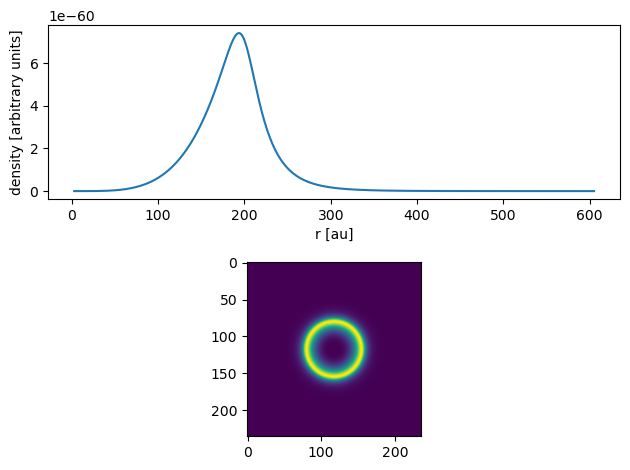

In [27]:
fig, ax = plt.subplots(2)
ax[0].plot(mod.r/const.AU, np.sum(mod.rho2d, axis=0))
ax[0].set_xlabel('r [au]')
ax[0].set_ylabel('density [arbitrary units]')
ax[1].imshow(mod.ims[0].val)
plt.tight_layout()

# Inner erf + Outer Power Law

In [7]:
rad_params = {'Rc': 230, 'sigma_in': 0.1, 'alpha_out': 15}

vert_params = {'Hc' : .03,
               'Rc' : 1,
               'psi' : 1.}

In [8]:
mod  = DD.Disk(L_star=1, # L_sun
               inc=0, # Degrees
               sigma_crit = 1e-59,
               radial_func='single_erf', # options: gaussian
               radial_params=rad_params,
               vert_func='gaussian',
               vert_params=vert_params,
               obs=obs_params,
               rmax=7)

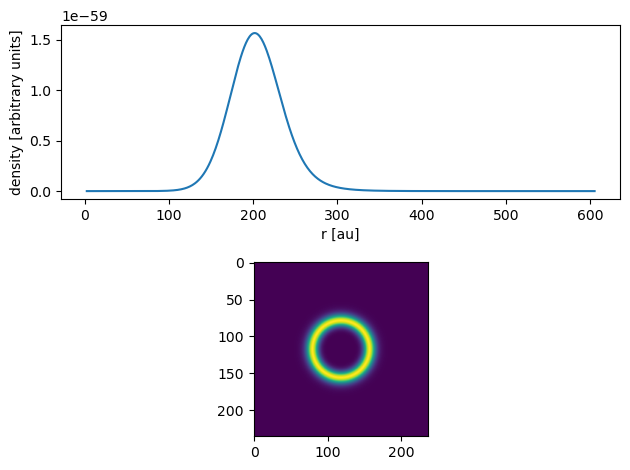

In [9]:
fig, ax = plt.subplots(2)
ax[0].plot(mod.r/const.AU, np.sum(mod.rho2d, axis=0))
ax[0].set_xlabel('r [au]')
ax[0].set_ylabel('density [arbitrary units]')
ax[1].imshow(mod.ims[0].val)
plt.tight_layout()

# Asymmetric Gaussian

In [10]:
rad_params = {'Rc': 200, 'sigma_in': 40, 'sigma_out': 27}

vert_params = {'Hc' : .03,
               'Rc' : 1,
               'psi' : 1.}

In [11]:
mod  = DD.Disk(L_star=1, # L_sun
               inc=0, # Degrees
               sigma_crit = 1e-59,
               radial_func='asymmetric_gaussian',
               radial_params=rad_params,
               vert_func='gaussian',
               vert_params=vert_params,
               obs=obs_params,
               rmax=7)

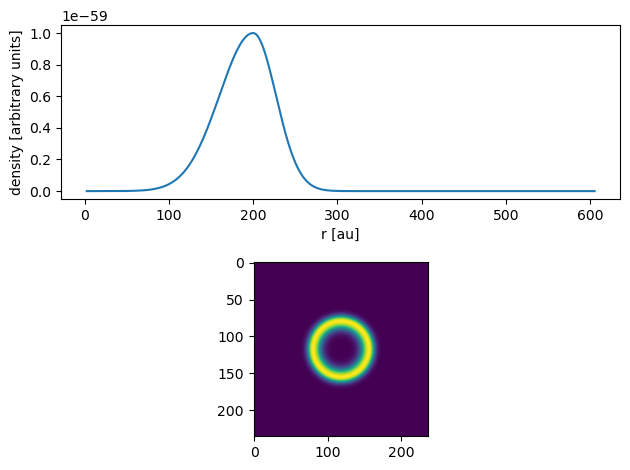

In [12]:
fig, ax = plt.subplots(2)
ax[0].plot(mod.r/const.AU, np.sum(mod.rho2d, axis=0))
ax[0].set_xlabel('r [au]')
ax[0].set_ylabel('density [arbitrary units]')
ax[1].imshow(mod.ims[0].val)
plt.tight_layout()

# Inner erf + Power Law + Outer erf

In [13]:
rad_params = {'Rin': 130, 'Rout' : 210, 'sigma_in': 0.03, 'sigma_out': 0.03, 'alpha' : 1}

vert_params = {'Hc' : .03,
               'Rc' : 1,
               'psi' : 1.}

In [14]:
mod  = DD.Disk(L_star=1, # L_sun
               inc=0, # Degrees
               sigma_crit = 1e-59,
               radial_func='powerlaw_errf', # options: gaussian
               radial_params=rad_params,
               vert_func='gaussian',
               vert_params=vert_params,
               obs=obs_params,
               rmax=7)

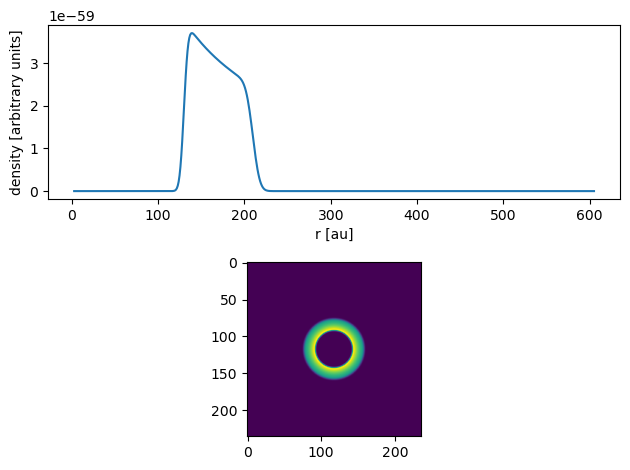

In [15]:
fig, ax = plt.subplots(2)
ax[0].plot(mod.r/const.AU, np.sum(mod.rho2d, axis=0))
ax[0].set_xlabel('r [au]')
ax[0].set_ylabel('density [arbitrary units]')
ax[1].imshow(mod.ims[0].val)
plt.tight_layout()

# Double Gaussian

In addition to functional forms defined in the code, it is possible to add multiple functional forms together by putting them in a list.

In [16]:
rad_params_1 = {'R': 130, 'sigma' : 15}

rad_params_2 = {'norm' : 1.5, 'R': 200, 'sigma' : 30}

vert_params = {'Hc' : .03,
               'Rc' : 1,
               'psi' : 1.}

In [17]:
mod  = DD.Disk(L_star=1, # L_sun
               inc=0, # Degrees
               sigma_crit = 1e-59,
               radial_func=['gaussian', 'gaussian'], # options: gaussian
               radial_params =[rad_params_1, rad_params_2],
               vert_func='gaussian',
               vert_params=vert_params,
               obs=obs_params,
               rmax=7)

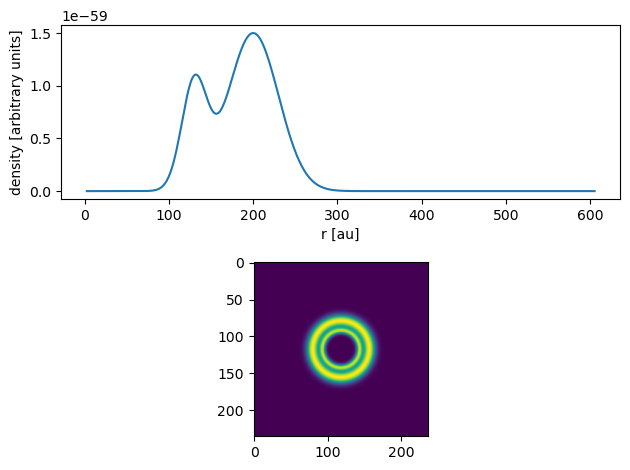

In [18]:
fig, ax = plt.subplots(2)

ax[0].plot(mod.r/const.AU, np.sum(mod.rho2d, axis=0))
ax[0].set_xlabel('r [au]')
ax[0].set_ylabel('density [arbitrary units]')
ax[1].imshow(mod.ims[0].val)
plt.tight_layout()

# Gaussian + Gap

You can also add gaps, as follows

In [19]:
rad_params = {'R': 200, 'sigma' : 50}

gap_params = {'depth' : 0.5, 'R': 200, 'sigma' : 10}

vert_params = {'Hc' : .03,
               'Rc' : 1,
               'psi' : 1.}

In [20]:
mod  = DD.Disk(L_star=1, # L_sun
               inc=0, # Degrees
               sigma_crit = 1e-59,
               radial_func='gaussian', # options: gaussian
               radial_params = rad_params,
               gap = True,
               gap_params = gap_params,
               vert_func='gaussian',
               vert_params=vert_params,
               obs=obs_params,
               rmax=7)

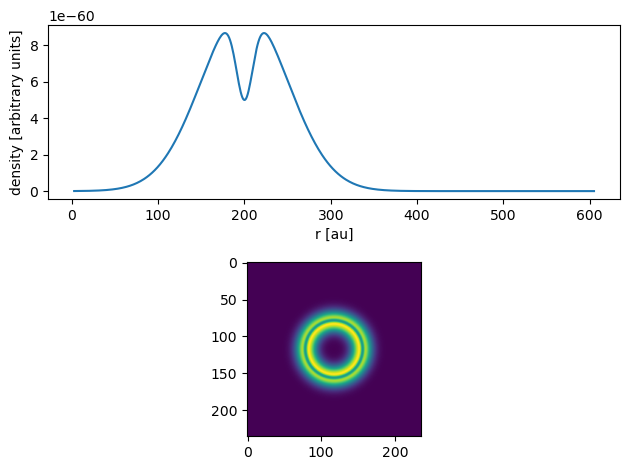

In [21]:
fig, ax = plt.subplots(2)

ax[0].plot(mod.r/const.AU, np.sum(mod.rho2d, axis=0))
ax[0].set_xlabel('r [au]')
ax[0].set_ylabel('density [arbitrary units]')
ax[1].imshow(mod.ims[0].val)
plt.tight_layout()

# Gaussian + 2 Gaps

Or multiple gaps, in a list

In [22]:
rad_params = {'R': 130, 'sigma' : 100}

gap_params_1 = {'depth' : 1, 'R': 100, 'sigma' : 5}

gap_params_2 = {'depth' : 0.7, 'R': 180, 'sigma' : 10}

vert_params = {'Hc' : .03,
               'Rc' : 1,
               'psi' : 1.}

In [23]:
mod  = DD.Disk(L_star=1, # L_sun
               inc=0, # Degrees
               sigma_crit = 1e-59,
               radial_func='gaussian', # options: gaussian
               radial_params = rad_params,
               gap = True,
               gap_params = [gap_params_1, gap_params_2],
               vert_func='gaussian',
               vert_params=vert_params,
               obs=obs_params,
               rmax=7)

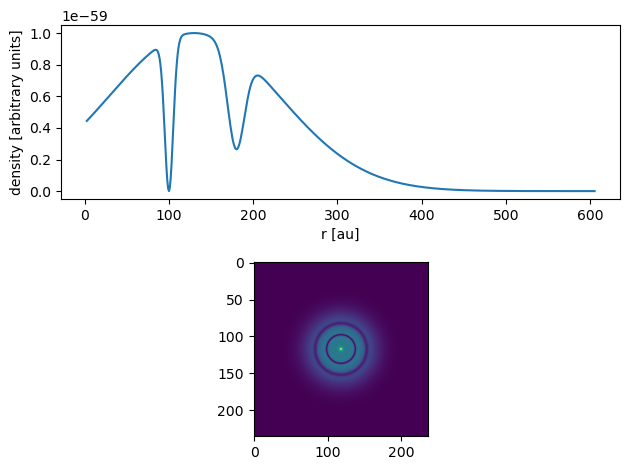

In [24]:
fig, ax = plt.subplots(2)

ax[0].plot(mod.r/const.AU, np.sum(mod.rho2d, axis=0))
ax[0].set_xlabel('r [au]')
ax[0].set_ylabel('density [arbitrary units]')
ax[1].imshow(mod.ims[0].val)
plt.tight_layout()